In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

from astropy import constants as c
from astropy import units as u

In [2]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['xtick.labelsize'] = 'x-large'
#mpl.rcParams['xtick.major.size'] = 5 
#mpl.rcParams['xtick.major.width'] = 1.5 
mpl.rcParams['ytick.labelsize'] = 'x-large'
#mpl.rcParams['ytick.major.size'] = 5 
#mpl.rcParams['ytick.major.width'] = 1.5 
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['axes.grid']=True
mpl.rcParams['axes.titlesize']=20
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['legend.facecolor']='white'
mpl.rcParams['legend.fontsize']=18
mpl.rcParams['errorbar.capsize']=3

folder='/home/patrick/Dropbox/School/phys343/lab03/lab03report'

In [3]:
dat=pd.read_csv('vel.csv',na_values='na')

ls_all=dat['l']
ls_rad_all=ls_all*np.pi/180.

dat.dropna(inplace=True)
ls=np.array(dat['l'])
vmaxs=np.array(dat['vmax'])
vmins=np.array(dat['vmin'])
dvmaxs=np.array([dat['-dvmax'],
                 dat['+dvmax']])
dvmins=np.array([dat['-dvmin'],
                dat['+dvmin']])
ls_rad=ls*np.pi/180.

lis0=ls==0.
ls_fin=ls[~lis0]
vmaxs_fin=vmaxs[~lis0]
vmins_fin=vmins[~lis0]
dvmaxs_fin=np.array([dvmaxs[0][~lis0],
                     dvmaxs[1][~lis0]])
dvmins_fin=np.array([dvmins[0][~lis0],
                     dvmins[1][~lis0]])
ls_rad_fin=ls_rad[~lis0]

dat

,l,vmin,vmax,-dvmin,+dvmin,-dvmax,+dvmax
0,0.0,-163.239364,197.043850,7.800228,9.100266,10.938470,3.241020
1,-4.5,-85.237084,32.563122,9.100266,3.900114,6.500190,2.600076
2,-9.0,-73.536742,7.745920,105.303078,3.900114,10.150901,15.751398
3,-13.5,-152.839060,8.270967,3.900114,67.601976,5.075450,2.275202
4,-18.0,-145.038832,-7.130399,2.600076,2.600076,9.800870,17.501552
5,-22.5,-129.438376,-20.235184,2.600076,5.200152,7.800228,5.200152
6,-27.0,-107.337730,-11.134918,9.100266,2.600076,23.400684,6.500190
7,-31.5,-100.837540,-34.535602,7.800228,5.200152,1.300038,3.900114
8,-36.0,-87.837160,-20.235184,5.200152,7.800228,3.900114,7.800228
9,-40.5,-68.336590,-0.734614,7.800228,23.400684,16.900494,11.700342


## #4

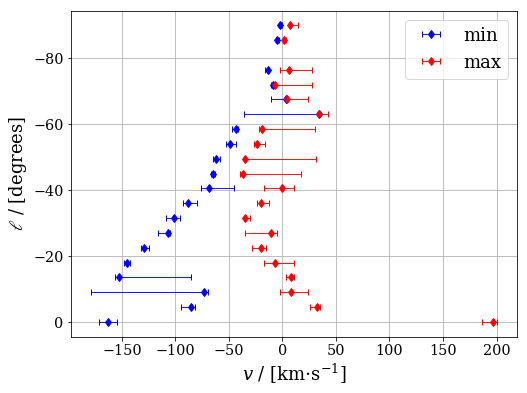

In [4]:
filename='vel.png'
path=folder+'/'+filename

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.errorbar(dat['vmin'],dat['l'],xerr=dvmins,fmt='bd',
            elinewidth=0.9,ecolor='blue',label='min')
ax.errorbar(dat['vmax'],dat['l'],xerr=dvmaxs,fmt='rd',
            elinewidth=0.9,ecolor='red',label='max')
ax.set_xlabel('$v$ / [km$\cdot$s$^{-1}$]')
ax.set_ylabel('$\ell$ / [degrees]')
ax.legend()
ax.axes.invert_yaxis()
fig.savefig(path)

## #5

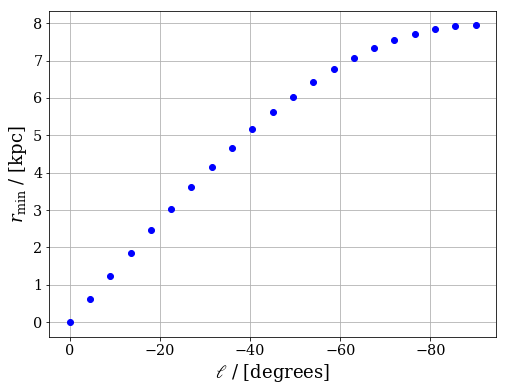

In [5]:
filename='rmin.png'
path=folder+'/'+filename

rmin_all=np.sin(np.abs(ls_rad_all))*7.94
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(ls_all,rmin_all,'bo')
ax.axes.invert_xaxis()
ax.set_xlabel('$\ell$ / [degrees]')
ax.set_ylabel('$r_\mathrm{min}$ / [kpc]')
fig.savefig(path)

## #6

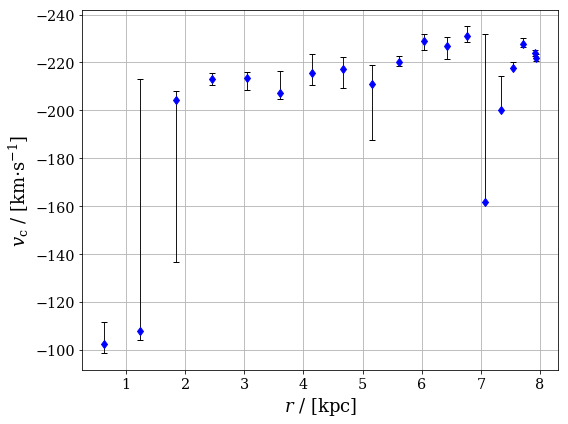

In [10]:
filename='vcurve.png'
path=folder+'/'+filename

rmins_fin=np.sin(np.abs(ls_rad_fin))*7.94
v0=220.
vs_fin=vmins_fin+v0*np.sin(ls_rad_fin)
#errors in v, based on dv/dvmin * dvmin:
dvs_fin=dvmins_fin

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.axes.invert_yaxis()
ax.errorbar(rmins_fin,vs_fin,dvs_fin,fmt='bd',
            elinewidth=0.9,ecolor='black')
ax.set_xlabel('$r$ / [kpc]')
ax.set_ylabel('$v_\mathrm{c}$ / [km$\cdot$s$^{-1}$]')
fig.tight_layout()
fig.savefig(path)

## #7

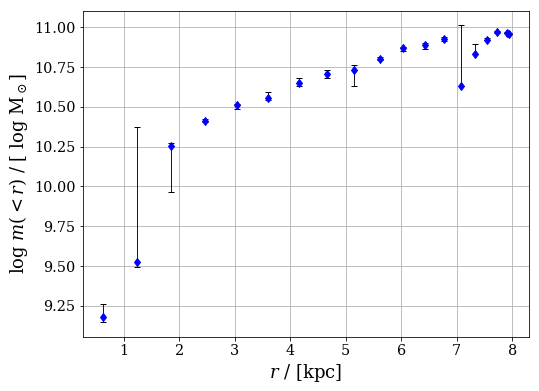

In [11]:
filename='m.png'
path=folder+'/'+filename

def m_f(r,v,dv):
    m=(r*v**2./c.G/c.M_sun).si #convert m to m/M_sun
    m=np.log10(m) #convert m to log(m/M_sun)
    #log error in log(m) based on dm/dv * dv:
    dm=(2.*dv/(v*np.log(10.))).si
    return m,dm

ms_fin,dms_fin=m_f(rmins_fin*u.kpc,
                   np.abs(vs_fin)*u.km/u.s,
                   #(reversing dvs_fin because masses are
                   #based on magnitude of velocity, and
                   #the original vs array is negative):
                   dvs_fin[::-1]*u.km/u.s)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.errorbar(rmins_fin,ms_fin,dms_fin,fmt='bd',
            elinewidth=0.9,ecolor='black')
ax.set_xlabel('$r$ / [kpc]')
ax.set_ylabel('log $m(<r)$ / [ log M$_\odot$]')
fig.savefig(path)